In [40]:
#import libraries 
import pandas as pd 
import numpy as np
import seaborn as sns 
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [41]:
#import dataset
df = pd.read_csv('delivery_time.csv')
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [42]:
#EDA and Data visulization

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [44]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

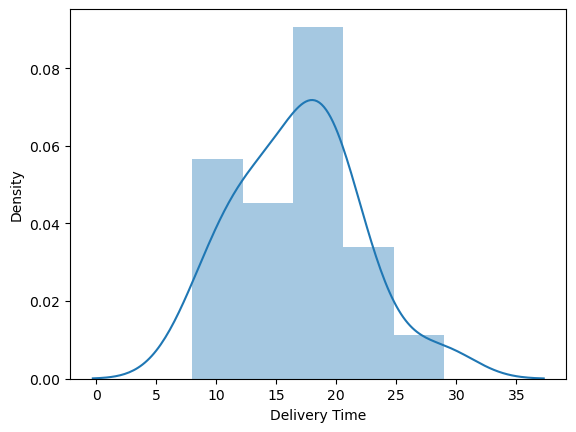

In [45]:
sns.distplot(df['Delivery Time'])

<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

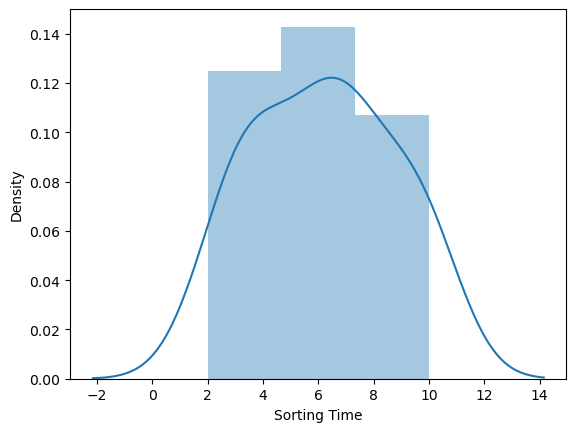

In [46]:
sns.distplot(df['Sorting Time'])

In [47]:
#Feature Engineering

In [48]:
#Renaming columns

In [49]:
df = df.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)

In [50]:
df

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [51]:
#correlation anylysis

In [52]:
df.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

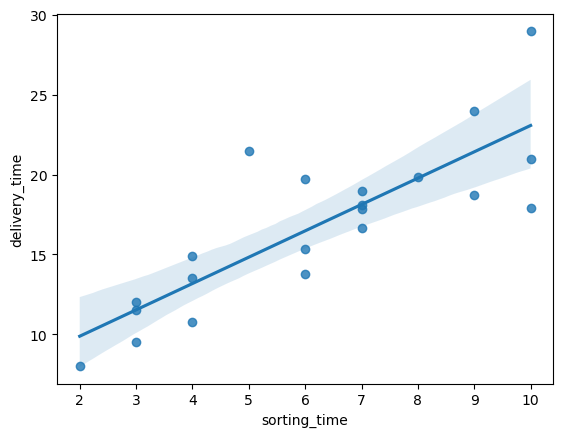

In [53]:
sns.regplot(x=df['sorting_time'],y=df['delivery_time'])

<AxesSubplot:>

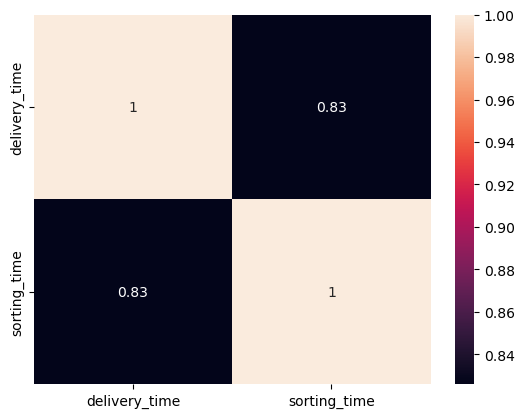

In [54]:
sns.heatmap(df.corr(),annot=True)

In [55]:
#model building

In [56]:
model=smf.ols('delivery_time~sorting_time',data=df).fit()

In [57]:
#model parameters

In [58]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [59]:
#print values for t values and p values
print(model.tvalues)
print(model.pvalues)

Intercept       3.823349
sorting_time    6.387447
dtype: float64
Intercept       0.001147
sorting_time    0.000004
dtype: float64


In [60]:
#r2 value
model.rsquared

0.6822714748417231

In [61]:
#model prediction

In [62]:
df.head(2)

,delivery_time,sorting_time
0,21.0,10
1,13.5,4


In [63]:
new_df=pd.DataFrame({
    'sorting_time':[12,9]
})
new_df

,sorting_time
0,12
1,9


In [64]:
model.predict(new_df)

0    26.370973
1    21.423913
dtype: float64

In [65]:
#data tranformation

In [67]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250

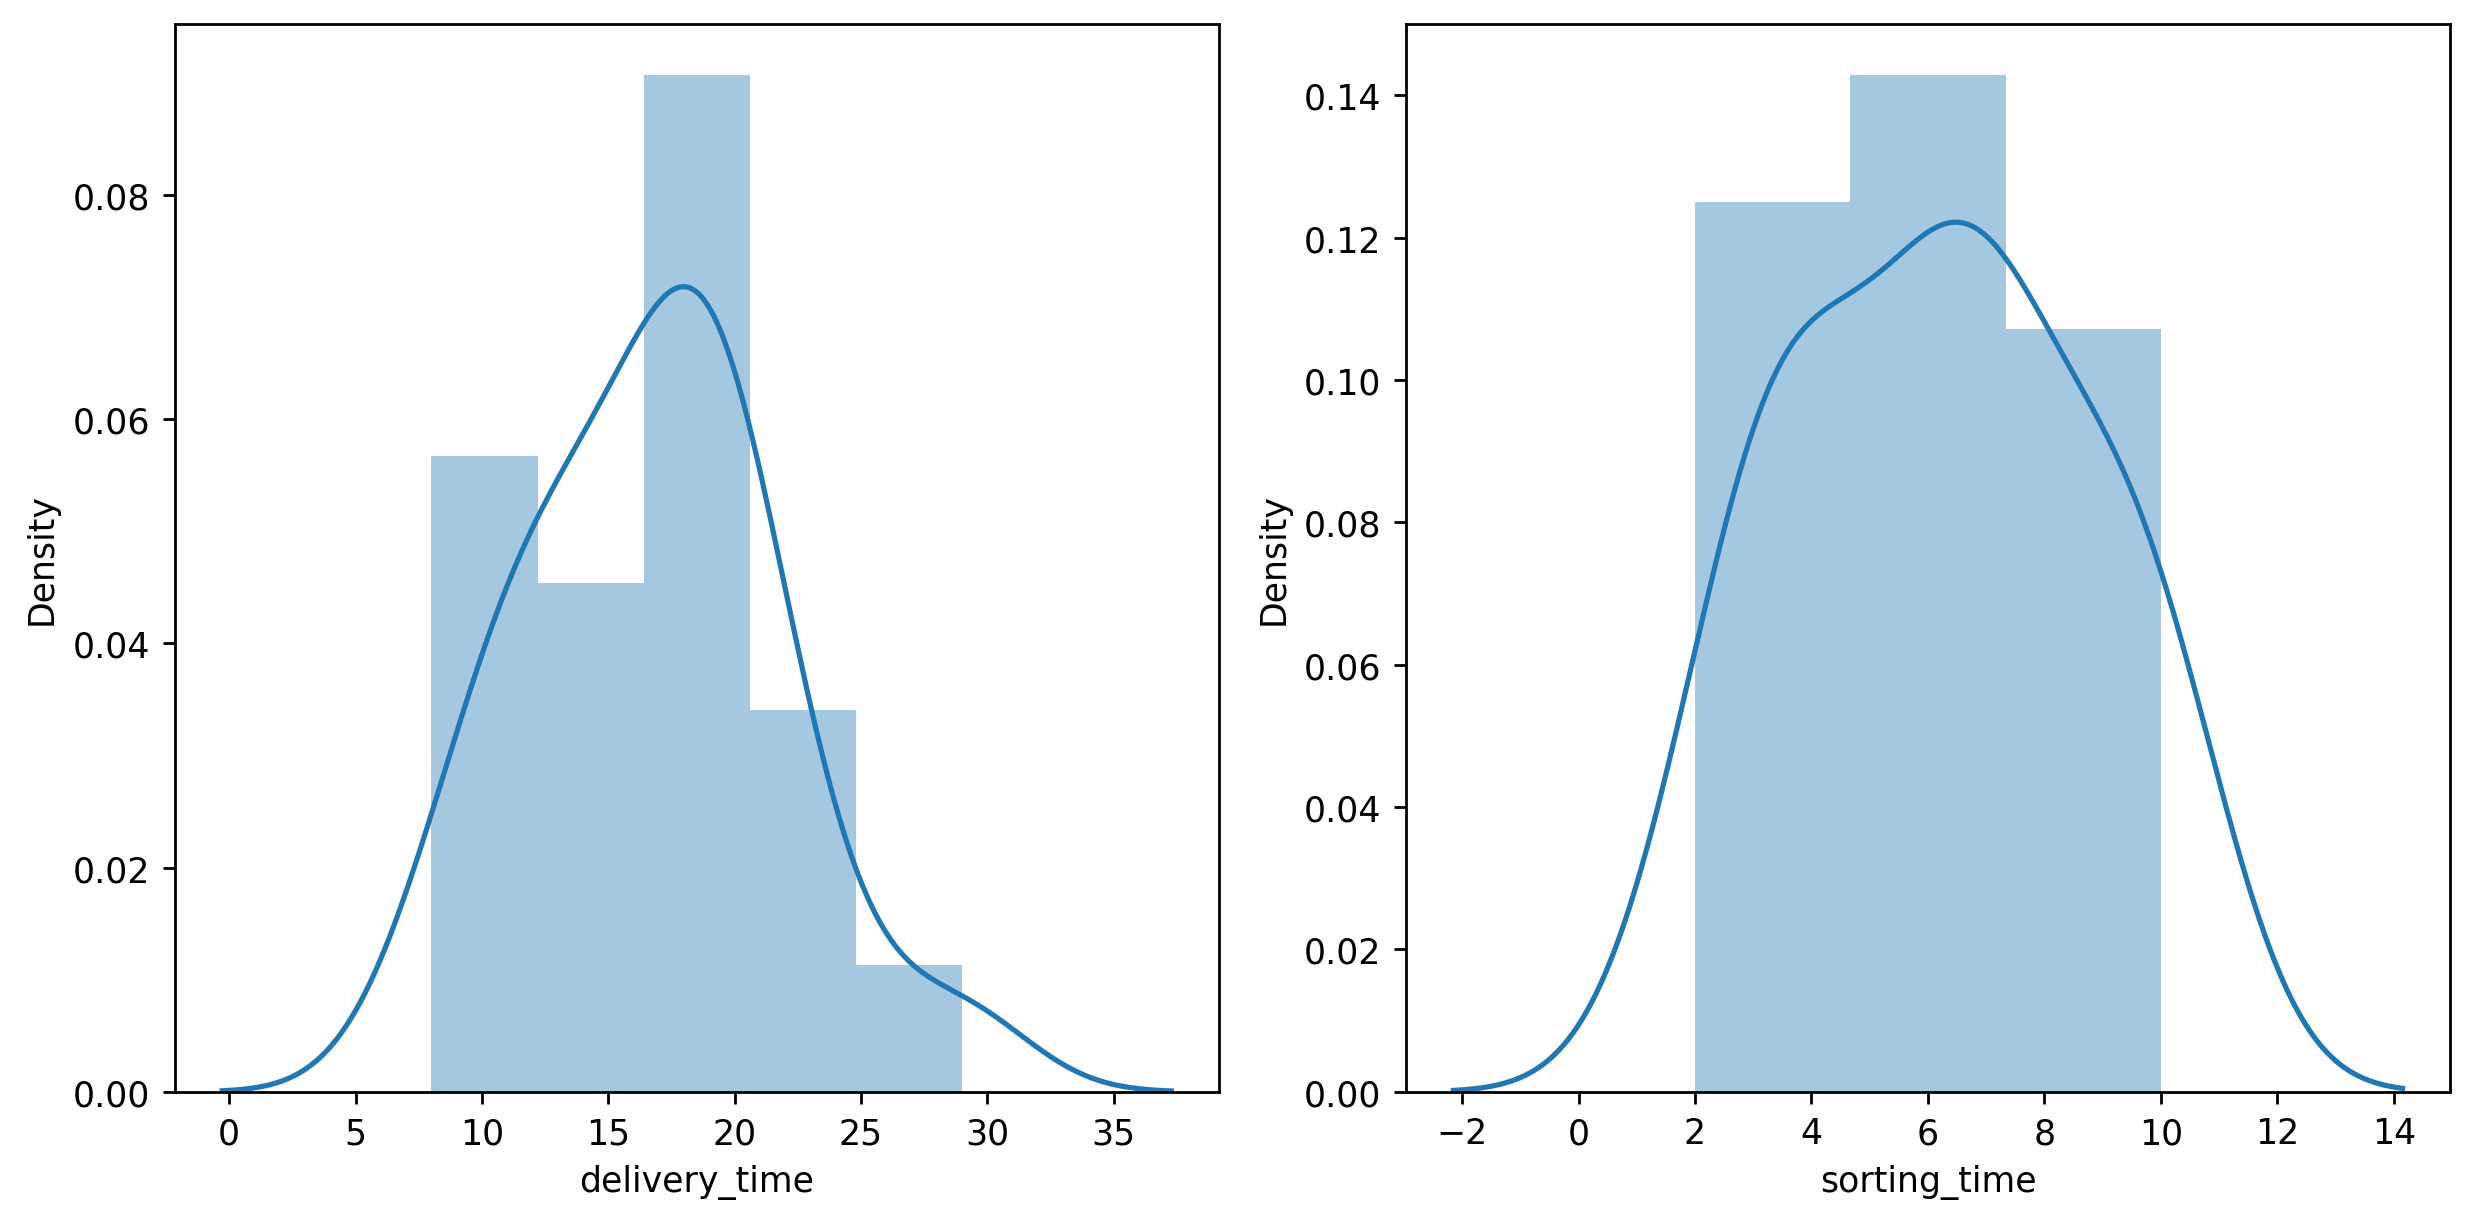

In [68]:
plt.subplot(1,2,1)
sns.distplot(df['delivery_time'])

plt.subplot(1,2,2)
sns.distplot(df['sorting_time'])
plt.tight_layout()

In [69]:
#Log transformation

In [70]:
df['log_delivery_time']=np.log(df['delivery_time'])

In [71]:
df.head(3)

,delivery_time,sorting_time,log_delivery_time
0,21.00,10,3.044522
1,13.50,4,2.602690
2,19.75,6,2.983153


In [72]:
df['log_sorting_time']=np.log(df['sorting_time'])

In [73]:
df.head(3)

,delivery_time,sorting_time,log_delivery_time,log_sorting_time
0,21.00,10,3.044522,2.302585
1,13.50,4,2.602690,1.386294
2,19.75,6,2.983153,1.791759


<AxesSubplot:xlabel='log_sorting_time', ylabel='Density'>

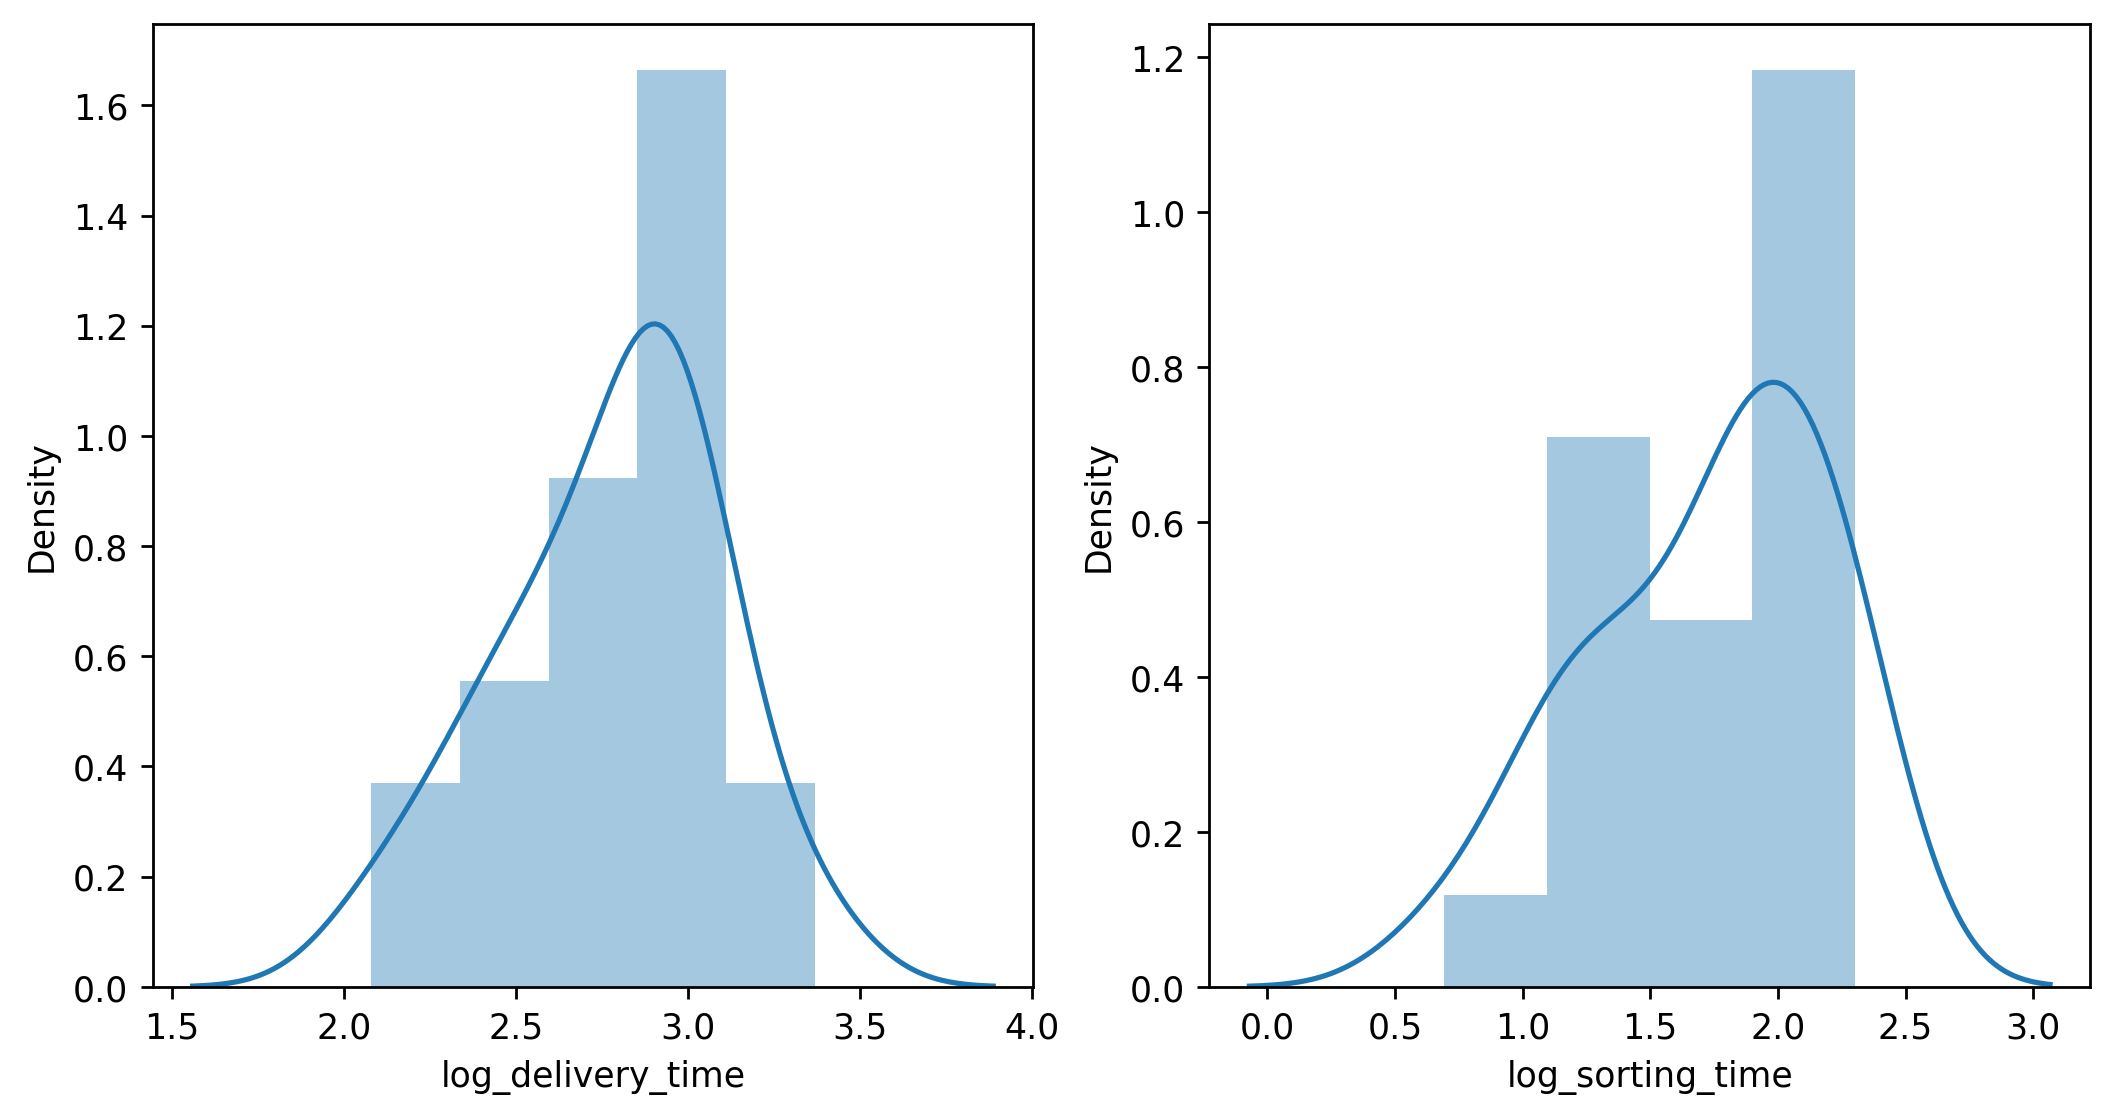

In [75]:
plt.subplot(1,2,1)
sns.distplot(df['log_delivery_time'])

plt.subplot(1,2,2)
sns.distplot(df['log_sorting_time'])

In [76]:
df['log_delivery_time'].skew()

-0.4512901148522999

In [79]:
df['sqrt_delivery_time']=np.sqrt(df['delivery_time'])
df.head()

,delivery_time,sorting_time,log_delivery_time,log_sorting_time,sqrt_delivery_time
0,21.00,10,3.044522,2.302585,4.582576
1,13.50,4,2.602690,1.386294,3.674235
2,19.75,6,2.983153,1.791759,4.444097
3,24.00,9,3.178054,2.197225,4.898979
4,29.00,10,3.367296,2.302585,5.385165


<AxesSubplot:xlabel='sqrt_delivery_time', ylabel='Density'>

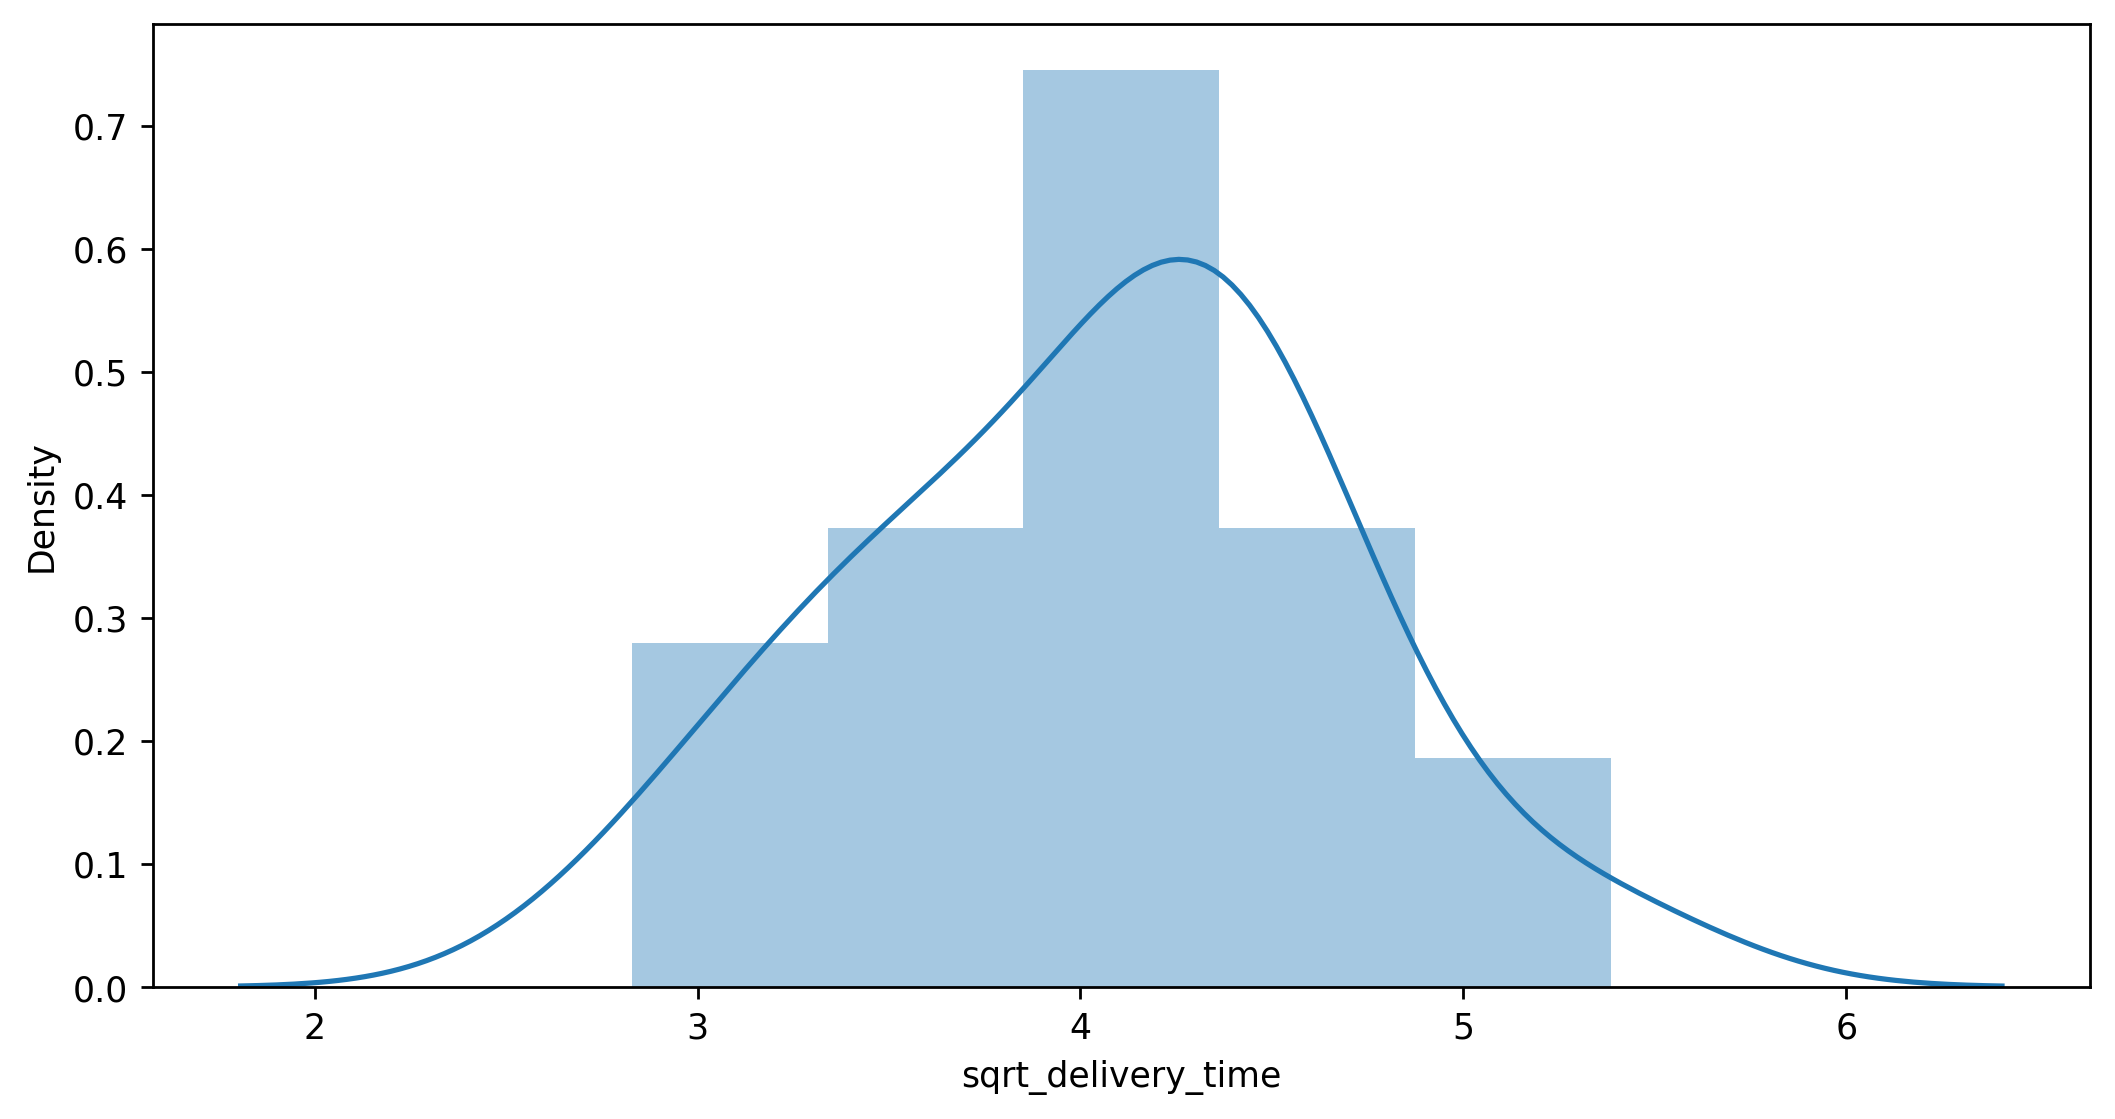

In [80]:
sns.distplot(df['sqrt_delivery_time'])

In [82]:
df['sqrt_delivery_time'].skew()

-0.0618105135865213